<a href="https://colab.research.google.com/github/Indrejue/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Antony_Farag_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
def stats(list1):  
  list2=[]  #create a second listto imput variables from a later function
  mean = sum(list1)/len(list1)# take the mean of all the values in list 1
  for i in range(len(list1)):#create a for loop to input variables from list 1 into lis2 after aplying math functions o list 1 items
    list2.append((list1[i] - mean)**2)  
  vari=sum(list2)/(len(list1)-1)#take the variance by dividing the sum of lis2 items by the length of list 1
  stand=vari**.5 #calculate the standard deviation by taking the squareroot of the variance
  return mean,vari,stand


In [2]:
sales=[3505,2400,3027,2798,3700,3250,2689]
stats(sales)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
#import my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#adjust float options to prevent scientific notation
np.set_printoptions(suppress=True)
# prevent pandas from displaying too long a decimal or defaulting to scientific notation
pd.options.display.float_format = '{:.5f}'.format
plt.style.use('dark_background')

In [4]:
# create the list of the amount of customers entering the store 
cust=[127,80,105,92,120,115,93]
cust

[127, 80, 105, 92, 120, 115, 93]

In [5]:
#create a dataframe of the sales and customer lists to take the covariance of
fake={'sales':sales,'cust':cust}
covdf =pd.DataFrame(fake)
covdf

,sales,cust
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [6]:
#take the covariance of the created dataframe
covdf.cov()

,sales,cust
sales,214387.90476,7604.35714
cust,7604.35714,290.95238


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [7]:
# take the standrad deviation of the cust list
custstats=np.array(stats(cust))
salestats=np.array(stats(sales))
print(custstats)
print(salestats)

[104.57142857 290.95238095  17.05732631]
[  3052.71428571 214387.9047619     463.02041506]


In [8]:
covdf.cov()/(custstats[2]*salestats[2])

,sales,cust
sales,27.14496,0.96283
cust,0.96283,0.03684


In [9]:
covdf.corr()

,sales,cust
sales,1.00000,0.96283
cust,0.96283,1.00000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [10]:
#import titanic list
titanicdf=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanicdf.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.00000,1.00000,"Allen, Miss. Elisabeth Walton",female,29.00000,0.00000,0.00000,24160,211.33750,B5,S,2,nan,"St Louis, MO",1
1,2,1.00000,1.00000,"Allison, Master. Hudson Trevor",male,0.91670,1.00000,2.00000,113781,151.55000,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON",1
2,3,1.00000,0.00000,"Allison, Miss. Helen Loraine",female,2.00000,1.00000,2.00000,113781,151.55000,C22 C26,S,NaN,nan,"Montreal, PQ / Chesterville, ON",1
3,4,1.00000,0.00000,"Allison, Mr. Hudson Joshua Creighton",male,30.00000,1.00000,2.00000,113781,151.55000,C22 C26,S,NaN,135.00000,"Montreal, PQ / Chesterville, ON",1
4,5,1.00000,0.00000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00000,1.00000,2.00000,113781,151.55000,C22 C26,S,NaN,nan,"Montreal, PQ / Chesterville, ON",1


In [11]:
# Drop the extrenous unnamed column
titanicdf=titanicdf.drop('Unnamed: 0',axis=1)
titanicdf.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.00000,1.00000,"Allen, Miss. Elisabeth Walton",female,29.00000,0.00000,0.00000,24160,211.33750,B5,S,2,nan,"St Louis, MO",1
1,1.00000,1.00000,"Allison, Master. Hudson Trevor",male,0.91670,1.00000,2.00000,113781,151.55000,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON",1
2,1.00000,0.00000,"Allison, Miss. Helen Loraine",female,2.00000,1.00000,2.00000,113781,151.55000,C22 C26,S,NaN,nan,"Montreal, PQ / Chesterville, ON",1
3,1.00000,0.00000,"Allison, Mr. Hudson Joshua Creighton",male,30.00000,1.00000,2.00000,113781,151.55000,C22 C26,S,NaN,135.00000,"Montreal, PQ / Chesterville, ON",1
4,1.00000,0.00000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00000,1.00000,2.00000,113781,151.55000,C22 C26,S,NaN,nan,"Montreal, PQ / Chesterville, ON",1


In [12]:
#check if embarked is catagorical by seeing how many types of unique values there are
titanicdf['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
# convert th embarked column to numarical values S=1 C=2 and Q=3
titanicdf['embarked']=titanicdf['embarked'].replace({'S':1,'C':2,'Q':3})

In [14]:
# Convert males to 1 and females to 2
titanicdf['sex']=titanicdf['sex'].replace({'male':1,'female':2})

In [15]:
titanicdf.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.00000,1.00000,"Allen, Miss. Elisabeth Walton",2.00000,29.00000,0.00000,0.00000,24160,211.33750,B5,1,2,nan,"St Louis, MO",1
1,1.00000,1.00000,"Allison, Master. Hudson Trevor",1.00000,0.91670,1.00000,2.00000,113781,151.55000,C22 C26,1,11,nan,"Montreal, PQ / Chesterville, ON",1
2,1.00000,0.00000,"Allison, Miss. Helen Loraine",2.00000,2.00000,1.00000,2.00000,113781,151.55000,C22 C26,1,NaN,nan,"Montreal, PQ / Chesterville, ON",1
3,1.00000,0.00000,"Allison, Mr. Hudson Joshua Creighton",1.00000,30.00000,1.00000,2.00000,113781,151.55000,C22 C26,1,NaN,135.00000,"Montreal, PQ / Chesterville, ON",1
4,1.00000,0.00000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",2.00000,25.00000,1.00000,2.00000,113781,151.55000,C22 C26,1,NaN,nan,"Montreal, PQ / Chesterville, ON",1


In [16]:
#calculate the variance covariance matrix
titanicdf.cov()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body,has_cabin_number
pclass,0.70197,-0.12725,-0.05001,-3.95460,0.05309,0.01329,-24.22779,0.02129,-2.87665,-0.24999
survived,-0.12725,0.23625,0.12309,-0.31434,-0.01409,0.03478,6.14602,0.03127,0.00000,0.06141
sex,-0.05001,0.12309,0.22944,-0.35420,0.05469,0.08836,4.60032,0.03770,0.38767,0.02751
age,-3.95460,-0.31434,-0.35420,165.85002,-2.55981,-1.45938,114.41661,0.30138,81.62292,1.46314
sibsp,0.05309,-0.01409,0.05469,-2.55981,1.08505,0.33683,8.64177,-0.05001,-8.70847,-0.00395
parch,0.01329,0.03478,0.08836,-1.45938,0.33683,0.74919,9.92803,-0.05403,4.23719,0.01332
fare,-24.22779,6.14602,4.60032,114.41661,8.64177,9.92803,2678.95974,2.06805,-179.16468,10.97696
embarked,0.02129,0.03127,0.03770,0.30138,-0.05001,-0.05403,2.06805,0.42685,1.92011,0.00902
body,-2.87665,0.00000,0.38767,81.62292,-8.70847,4.23719,-179.16468,1.92011,9544.68857,3.62569
has_cabin_number,-0.24999,0.06141,0.02751,1.46314,-0.00395,0.01332,10.97696,0.00902,3.62569,0.17461


In [17]:
#calculate the correlation matrix
titanicdf.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body,has_cabin_number
pclass,1.00000,-0.31247,-0.12462,-0.36637,0.06083,0.01832,-0.55863,0.03888,-0.03464,-0.71386
survived,-0.31247,1.00000,0.52869,-0.05020,-0.02783,0.08266,0.24427,0.09845,nan,0.30225
sex,-0.12462,0.52869,1.00000,-0.05740,0.10961,0.21313,0.18552,0.12042,0.01590,0.13740
age,-0.36637,-0.05020,-0.05740,1.00000,-0.19075,-0.13087,0.17189,0.03582,0.05906,0.27189
sibsp,0.06083,-0.02783,0.10961,-0.19075,1.00000,0.37359,0.16024,-0.07346,-0.09996,-0.00906
parch,0.01832,0.08266,0.21313,-0.13087,0.37359,1.00000,0.22154,-0.09552,0.05110,0.03681
fare,-0.55863,0.24427,0.18552,0.17189,0.16024,0.22154,1.00000,0.06113,-0.04311,0.50725
embarked,0.03888,0.09845,0.12042,0.03582,-0.07346,-0.09552,0.06113,1.00000,0.03386,0.03302
body,-0.03464,nan,0.01590,0.05906,-0.09996,0.05110,-0.04311,0.03386,1.00000,0.08380
has_cabin_number,-0.71386,0.30225,0.13740,0.27189,-0.00906,0.03681,0.50725,0.03302,0.08380,1.00000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?
also known as perpendicular

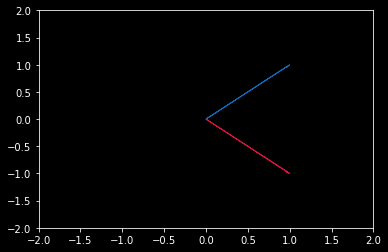

In [18]:
#plot an arrow going from (0,0) to (1,1)
plt.arrow(0,0,1,1,overhang=.3,head_width=.02, head_length=.06, color='#0f6ab9',length_includes_head= True,shape='left')
#plot an arrow going from (0,0) to (1,-1)which should b perpendicular to the orriginal arrow
plt.arrow(0,0,1,-1,overhang=.3,head_width=.02, head_length=.06, color='crimson',length_includes_head= True,shape='left')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

not orthagonal becaue the dot product is not 0

In [19]:
#define array a
a=np.array([-5,3,7])
#define array b
b=np.array([6,-8,2])
#take the dot product of the too arrays to see if they are perpendicular
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [20]:
#creat array c
c=np.array([2,-15,6,20])


In [24]:
#take the norm of c and square it
normc=np.linalg.norm(c)
csquare=normc**2
print(csquare)

665.0


In [25]:
#take the dotproduct of c against itself
np.dot(c,c)

665

In [26]:
np.dot(c.T,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [27]:
#creat the vector array f
f=np.array([4,12,11,9,2])


In [28]:
# take the norm of f
normf=np.linalg.norm(f)

In [29]:
unit=f/normf
print (unit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

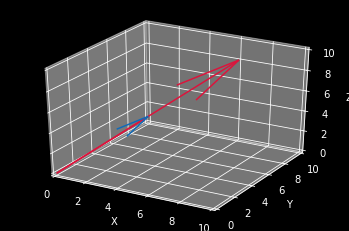

In [39]:
# Create 2 vectors that are linearly dependent
p=np.array([0,0,0,3,5,4])
q=np.array([0,0,0,6,10,8])
#zip the array values to defined variables that can be read by the ploting function
X,Y,Z,U,V,W=zip(p,q)
# setting up colors
colors=['crimson','crimson','#0f6ab9','#0f6ab9']
#setting up the graph paramiter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plotin the arrows
ax.quiver(X,Y,Z,U,V,W, color=colors)
# Setting the bounds of the graph space
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
#lableing the 3 axes of the graph
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

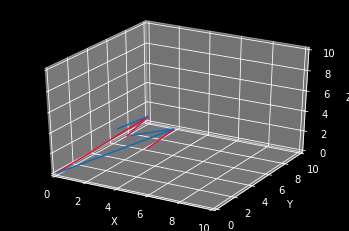

In [43]:
# Create 2 vectors that are liniarly independent
r=np.array([0,0,0,3,5,4])
s=np.array([0,0,0,7,1,6])
#zip the array values to defined variables that can be read by the ploting function
X,Y,Z,U,V,W=zip(r,s)
# setting up colors
colors=['crimson','#0f6ab9']
#setting up the graph paramiter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plotin the arrows
ax.quiver(X,Y,Z,U,V,W, color=colors)
# Setting the bounds of the graph space
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
#lableing the 3 axes of the graph
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

they are scalars of each other and are liniarly dependent so the span is the line that they lie upon

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

the span is the 3demensional space all around them because any combiniation between them can be created by combining their vecorts as none are liniarly dependent on the other

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



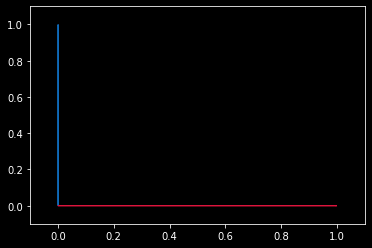

In [45]:
plt.arrow(0,0,0,1,color='#0f6ab9',length_includes_head= True,shape='left')
plt.arrow(0,0,1,0,color='crimson',length_includes_head= True,shape='left')
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.show()

## 6.2 What does it mean to form a basis?

the 2 vectors are linearly independent and the combination of their vectors can make up the entire space of the demensional plane

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

the rank is 3

## 7.2 What does the rank of a matrix tell us?

the spacial dementions of the matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

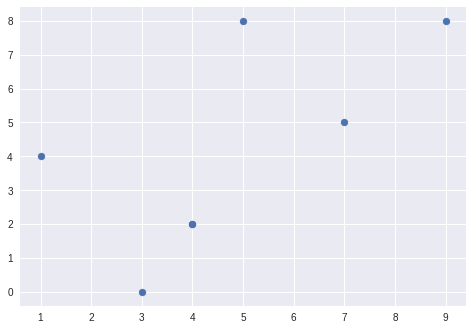

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()